In [64]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline

In [65]:
pd.set_option('display.max_columns', None)

## Lab | Customer Analysis Round 2

For this lab, we will be using the marketing_customer_analysis.csv file that you can find in the files_for_lab folder. Check out the files_for_lab/about.md to get more information if you are using the Online Excel.

Note: For the next labs we will be using the same data file. Please save the code, so that you can re-use it later in the labs following this lab.

### Dealing with the data

1. Show the dataframe shape.
2. Standardize header names.
3. Which columns are numerical?
4. Which columns are categorical?
5. Check and deal with NaN values.
6. Datetime format - Extract the months from the dataset and store in a separate column. Then filter the data to show only the information for the first quarter , ie. January, February and March. Hint: If data from March does not exist, consider only January and February.
7. BONUS: Put all the previously mentioned data transformations into a function.

In [66]:
# loading file, showing head, tail and shape - no empty rows at the tail end as in round 1 - 10910 rows altogether

data = pd.read_csv('files_for_lab/csv_files/marketing_customer_analysis.csv')
data = data.drop(['Unnamed: 0'],axis=1)
display(data.shape)
display(data.columns)
display(data.head())
display(data.tail())

(10910, 25)

Index(['Customer', 'State', 'Customer Lifetime Value', 'Response', 'Coverage',
       'Education', 'Effective To Date', 'EmploymentStatus', 'Gender',
       'Income', 'Location Code', 'Marital Status', 'Monthly Premium Auto',
       'Months Since Last Claim', 'Months Since Policy Inception',
       'Number of Open Complaints', 'Number of Policies', 'Policy Type',
       'Policy', 'Renew Offer Type', 'Sales Channel', 'Total Claim Amount',
       'Vehicle Class', 'Vehicle Size', 'Vehicle Type'],
      dtype='object')

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,Location Code,Marital Status,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size,Vehicle Type
0,DK49336,Arizona,4809.216960,No,Basic,College,2/18/11,Employed,M,48029,Suburban,Married,61,7.0,52,0.0,9,Corporate Auto,Corporate L3,Offer3,Agent,292.800000,Four-Door Car,Medsize,NaN
1,KX64629,California,2228.525238,No,Basic,College,1/18/11,Unemployed,F,0,Suburban,Single,64,3.0,26,0.0,1,Personal Auto,Personal L3,Offer4,Call Center,744.924331,Four-Door Car,Medsize,NaN
2,LZ68649,Washington,14947.917300,No,Basic,Bachelor,2/10/11,Employed,M,22139,Suburban,Single,100,34.0,31,0.0,2,Personal Auto,Personal L3,Offer3,Call Center,480.000000,SUV,Medsize,A
3,XL78013,Oregon,22332.439460,Yes,Extended,College,1/11/11,Employed,M,49078,Suburban,Single,97,10.0,3,0.0,2,Corporate Auto,Corporate L3,Offer2,Branch,484.013411,Four-Door Car,Medsize,A
4,QA50777,Oregon,9025.067525,No,Premium,Bachelor,1/17/11,Medical Leave,F,23675,Suburban,Married,117,NaN,31,NaN,7,Personal Auto,Personal L2,Offer1,Branch,707.925645,Four-Door Car,Medsize,NaN


,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,Location Code,Marital Status,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size,Vehicle Type
10905,FE99816,Nevada,15563.369440,No,Premium,Bachelor,1/19/11,Unemployed,F,0,Suburban,Married,253,NaN,40,NaN,7,Personal Auto,Personal L1,Offer3,Web,1214.400000,Luxury Car,Medsize,A
10906,KX53892,Oregon,5259.444853,No,Basic,College,1/6/11,Employed,F,61146,Urban,Married,65,7.0,68,0.0,6,Personal Auto,Personal L3,Offer2,Branch,273.018929,Four-Door Car,Medsize,A
10907,TL39050,Arizona,23893.304100,No,Extended,Bachelor,2/6/11,Employed,F,39837,Rural,Married,201,11.0,63,0.0,2,Corporate Auto,Corporate L3,Offer1,Web,381.306996,Luxury SUV,Medsize,NaN
10908,WA60547,California,11971.977650,No,Premium,College,2/13/11,Employed,F,64195,Urban,Divorced,158,0.0,27,4.0,6,Personal Auto,Personal L1,Offer1,Branch,618.288849,SUV,Medsize,A
10909,IV32877,NaN,6857.519928,NaN,Basic,Bachelor,1/8/11,Unemployed,M,0,Suburban,Single,101,31.0,1,0.0,3,Personal Auto,Personal L1,Offer4,Web,1021.719397,SUV,Medsize,NaN


##  

### Below are my functions, which I'll keep here at the top as it is the combination of my efforts further below 

In [67]:
# I built my functions step-by-step and re-ran it multiple times to verify it was working after adding new lines

# Dataset cleaning function below

def CleanData(df):
    # below lines to change headers to lowercase
    cols = []
    for column in df.columns:
        cols.append(column.lower())
    cols
    df.columns = cols
    
    # below lines to take out spaces in titles
    df.columns = df.columns.str.replace(' ', '_')

    # below lines merges 3292 duplicate rows to 1516 with NaNs being replaced by valid data taken from the merged 
    # cells! See more details in my experiment section further below.
    df = df.replace('',np.nan, regex=True)
    df = df.groupby('customer',as_index=False,sort=False).last()
        
    # below replaces the only 337 remaining NaNs in column 'vehicle_type' with 'unknown'
    df = df.fillna('unknown')
    
    # converting the date in column 'effective_to_date' to datetime
    df['effective_to_date'] = pd.to_datetime(df['effective_to_date'])
    
    # below lines to display result
#     print("dataframe shape:", df.shape)
#     print("clean headers:", df.columns)
    
    # below lines to contrast numerical and categorical data with further insight
#     display(data.describe().T)
#     display(data.describe(include=[object]).T)
    
#     display(df.head())
#     display(df.tail())
    return df

In [71]:
data = CleanData(data)
data.shape

(9134, 25)

In [14]:
# not sure as to why, but my dupliacte merger code does not work when placed inside the above function?!?
# I placed it below for the last step in data cleaning and obtaining a NaN-free dataset
# I tried fiddling with the function implement, but couldn't get it to work...
    
# below lines merges 3292 duplicate rows to 1516 with NaNs being replaced by valid data taken from the merged 
# cells! See more details in my experiment section further below.
data = data.replace('',np.nan, regex=True)
data = data.groupby('customer',as_index=False,sort=False).last()
    
# below replaces the only 337 remaining NaNs in column 'vehicle_type' with 'unknown'
data = data.fillna('unknown')
    
display(data.describe().T)
display(data.describe(include=[object]).T)

,count,mean,std,min,25%,50%,75%,max
customer_lifetime_value,9134.0,8004.940475,6870.967608,1898.007675,3994.251794,5780.182197,8962.167041,83325.381190
income,9134.0,37657.380009,30379.904734,0.000000,0.000000,33889.500000,62320.000000,99981.000000
monthly_premium_auto,9134.0,93.219291,34.407967,61.000000,68.000000,83.000000,109.000000,298.000000
months_since_last_claim,9134.0,15.097000,10.073257,0.000000,6.000000,14.000000,23.000000,35.000000
months_since_policy_inception,9134.0,48.064594,27.905991,0.000000,24.000000,48.000000,71.000000,99.000000
number_of_open_complaints,9134.0,0.384388,0.910384,0.000000,0.000000,0.000000,0.000000,5.000000
number_of_policies,9134.0,2.966170,2.390182,1.000000,1.000000,2.000000,4.000000,9.000000
total_claim_amount,9134.0,434.088794,290.500092,0.099007,272.258244,383.945434,547.514839,2893.239678


,count,unique,top,freq
customer,9134,9134,DK49336,1
state,9134,5,California,3150
response,9134,2,No,7826
coverage,9134,3,Basic,5568
education,9134,5,Bachelor,2748
effective_to_date,9134,59,1/10/11,195
employmentstatus,9134,5,Employed,5698
gender,9134,2,F,4658
location_code,9134,3,Suburban,5779
marital_status,9134,3,Married,5298


# 

In [142]:
# I established a separate function for the filtering by quarter excercise as it seemed weird to incorporate that
# into my cleaning function

# Additionally: seems weird to create a column to extract the month and use that to filter by quarter, when
# we can simply create a quarter column from our date instead and filter by that!

# def Q1Filter(df):
#     df['quarter'] = df['effective_to_date'].dt.quarter

In [144]:
# In the end I decided to skip this as I ran out of time...

In [151]:
# datacopy = data
# Q1Filter(datacopy)

##  

### What follows below is my experimentation

In [83]:
# # My data cleaning requires that the headers have already been cleaned in accordance 
# # with what I set out to have them look as, so running the script below to clean the headers

# def ProperHeaders(df):
#     # below lines to change headers to lowercase
#     cols = []
#     for column in df.columns:
#         cols.append(column.lower())
#     cols
#     df.columns = cols
    
#     # below lines to take out spaces in titles
#     df.columns = df.columns.str.replace(' ', '_')

In [116]:
# instead of the below code I used on yesterday's excercise to only check for numerical data
# data._get_numeric_data()
# I instead use the two below to check for both numerical and categorical data with futher insights:

display(data.describe().T)
display(data.describe(include=[object]).T)

,count,mean,std,min,25%,50%,75%,max
Customer Lifetime Value,10910.0,8018.241094,6885.081434,1898.007675,4014.453113,5771.147235,8992.779137,83325.381190
Income,10910.0,37536.284785,30359.195670,0.000000,0.000000,33813.500000,62250.750000,99981.000000
Monthly Premium Auto,10910.0,93.196059,34.442532,61.000000,68.000000,83.000000,109.000000,298.000000
Months Since Last Claim,10277.0,15.149071,10.080349,0.000000,6.000000,14.000000,23.000000,35.000000
Months Since Policy Inception,10910.0,48.091934,27.940675,0.000000,24.000000,48.000000,71.000000,99.000000
Number of Open Complaints,10277.0,0.384256,0.912457,0.000000,0.000000,0.000000,0.000000,5.000000
Number of Policies,10910.0,2.979193,2.399359,1.000000,1.000000,2.000000,4.000000,9.000000
Total Claim Amount,10910.0,434.888330,292.180556,0.099007,271.082527,382.564630,547.200000,2893.239678


,count,unique,top,freq
Customer,10910,9134,ID89933,7
State,10279,5,California,3552
Response,10279,2,No,8813
Coverage,10910,3,Basic,6660
Education,10910,5,Bachelor,3272
Effective To Date,10910,59,1/10/11,239
EmploymentStatus,10910,5,Employed,6789
Gender,10910,2,F,5573
Location Code,10910,3,Suburban,6902
Marital Status,10910,3,Married,6319


In [133]:
# extracting month from effective_to_date

data['effective_to_date'] = pd.to_datetime(data['effective_to_date'])
data

data['month'] = pd.DatetimeIndex(data['effective_to_date']).month
data.head()

,customer,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,income,location_code,marital_status,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size,vehicle_type,month
0,DK49336,Arizona,4809.216960,No,Basic,College,2011-02-18,Employed,M,48029,Suburban,Married,61,7.0,52,0.0,9,Corporate Auto,Corporate L3,Offer3,Agent,292.800000,Four-Door Car,Medsize,NaN,2
1,KX64629,California,2228.525238,No,Basic,College,2011-01-18,Unemployed,F,0,Suburban,Single,64,3.0,26,0.0,1,Personal Auto,Personal L3,Offer4,Call Center,744.924331,Four-Door Car,Medsize,NaN,1
2,LZ68649,Washington,14947.917300,No,Basic,Bachelor,2011-02-10,Employed,M,22139,Suburban,Single,100,34.0,31,0.0,2,Personal Auto,Personal L3,Offer3,Call Center,480.000000,SUV,Medsize,A,2
3,XL78013,Oregon,22332.439460,Yes,Extended,College,2011-01-11,Employed,M,49078,Suburban,Single,97,10.0,3,0.0,2,Corporate Auto,Corporate L3,Offer2,Branch,484.013411,Four-Door Car,Medsize,A,1
4,QA50777,Oregon,9025.067525,No,Premium,Bachelor,2011-01-17,Medical Leave,F,23675,Suburban,Married,117,NaN,31,NaN,7,Personal Auto,Personal L2,Offer1,Branch,707.925645,Four-Door Car,Medsize,NaN,1


In [136]:
# df['Date'] = pd.to_datetime(df['Date']) -- if column is not datetime yet
data = data[data['effective_to_date'].dt.month <= 2]
data

,customer,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,income,location_code,marital_status,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size,vehicle_type,month
0,DK49336,Arizona,4809.216960,No,Basic,College,2011-02-18,Employed,M,48029,Suburban,Married,61,7.0,52,0.0,9,Corporate Auto,Corporate L3,Offer3,Agent,292.800000,Four-Door Car,Medsize,NaN,2
1,KX64629,California,2228.525238,No,Basic,College,2011-01-18,Unemployed,F,0,Suburban,Single,64,3.0,26,0.0,1,Personal Auto,Personal L3,Offer4,Call Center,744.924331,Four-Door Car,Medsize,NaN,1
2,LZ68649,Washington,14947.917300,No,Basic,Bachelor,2011-02-10,Employed,M,22139,Suburban,Single,100,34.0,31,0.0,2,Personal Auto,Personal L3,Offer3,Call Center,480.000000,SUV,Medsize,A,2
3,XL78013,Oregon,22332.439460,Yes,Extended,College,2011-01-11,Employed,M,49078,Suburban,Single,97,10.0,3,0.0,2,Corporate Auto,Corporate L3,Offer2,Branch,484.013411,Four-Door Car,Medsize,A,1
4,QA50777,Oregon,9025.067525,No,Premium,Bachelor,2011-01-17,Medical Leave,F,23675,Suburban,Married,117,NaN,31,NaN,7,Personal Auto,Personal L2,Offer1,Branch,707.925645,Four-Door Car,Medsize,NaN,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10905,FE99816,Nevada,15563.369440,No,Premium,Bachelor,2011-01-19,Unemployed,F,0,Suburban,Married,253,NaN,40,NaN,7,Personal Auto,Personal L1,Offer3,Web,1214.400000,Luxury Car,Medsize,A,1
10906,KX53892,Oregon,5259.444853,No,Basic,College,2011-01-06,Employed,F,61146,Urban,Married,65,7.0,68,0.0,6,Personal Auto,Personal L3,Offer2,Branch,273.018929,Four-Door Car,Medsize,A,1
10907,TL39050,Arizona,23893.304100,No,Extended,Bachelor,2011-02-06,Employed,F,39837,Rural,Married,201,11.0,63,0.0,2,Corporate Auto,Corporate L3,Offer1,Web,381.306996,Luxury SUV,Medsize,NaN,2
10908,WA60547,California,11971.977650,No,Premium,College,2011-02-13,Employed,F,64195,Urban,Divorced,158,0.0,27,4.0,6,Personal Auto,Personal L1,Offer1,Branch,618.288849,SUV,Medsize,A,2


In [32]:
# checking for NaNs in the dataset

data.isna().sum()

customer                            0
state                             631
customer_lifetime_value             0
response                          631
coverage                            0
education                           0
effective_to_date                   0
employmentstatus                    0
gender                              0
income                              0
location_code                       0
marital_status                      0
monthly_premium_auto                0
months_since_last_claim           633
months_since_policy_inception       0
number_of_open_complaints         633
number_of_policies                  0
policy_type                         0
policy                              0
renew_offer_type                    0
sales_channel                       0
total_claim_amount                  0
vehicle_class                     622
vehicle_size                      622
vehicle_type                     5482
dtype: int64

In [167]:
# creating a separate dataframe that only keeps the duplicate rows from data 
# - this gives a result of 3292 duplicate rows, quite a lot in my opinion

duplicates = data[data.duplicated('customer',keep=False)==True]
duplicates

,customer,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,income,location_code,marital_status,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size,vehicle_type
0,DK49336,Arizona,4809.216960,No,Basic,College,2/18/11,Employed,M,48029,Suburban,Married,61,7.0,52,0.0,9,Corporate Auto,Corporate L3,Offer3,Agent,292.800000,Four-Door Car,Medsize,NaN
4,QA50777,Oregon,9025.067525,No,Premium,Bachelor,1/17/11,Medical Leave,F,23675,Suburban,Married,117,NaN,31,NaN,7,Personal Auto,Personal L2,Offer1,Branch,707.925645,Four-Door Car,Medsize,NaN
5,HO81102,NaN,4745.181764,NaN,Basic,High School or Below,2/14/11,Employed,M,50549,Suburban,Divorced,61,2.0,73,0.0,7,Personal Auto,Personal L3,Offer1,Agent,292.800000,Four-Door Car,Medsize,A
11,GE63585,NaN,2420.711888,NaN,Basic,Bachelor,2/7/11,Employed,M,31710,Urban,Divorced,62,5.0,29,0.0,1,Corporate Auto,Corporate L3,Offer1,Call Center,199.551735,Two-Door Car,Medsize,NaN
15,CW49887,California,4626.801093,Yes,Basic,Master,1/16/11,Employed,F,79487,Suburban,Divorced,114,20.0,87,0.0,1,Special Auto,Special L1,Offer2,Branch,547.200000,SUV,Medsize,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10890,VQ78876,Oregon,4660.399573,No,Basic,Bachelor,2/3/11,Employed,F,89834,Rural,Married,116,24.0,11,0.0,1,Corporate Auto,Corporate L3,Offer1,Branch,43.155950,NaN,NaN,NaN
10894,EX63393,NaN,6314.492009,NaN,Extended,Master,2/27/11,Employed,F,66947,Suburban,Married,78,13.0,12,0.0,6,Personal Auto,Personal L1,Offer3,Agent,374.400000,Four-Door Car,Small,NaN
10899,WU60905,California,8610.667489,No,Basic,High School or Below,2/6/11,Unemployed,F,0,Suburban,Married,111,27.0,36,0.0,9,Corporate Auto,Corporate L1,Offer3,Web,532.800000,SUV,Medsize,A
10905,FE99816,Nevada,15563.369440,No,Premium,Bachelor,1/19/11,Unemployed,F,0,Suburban,Married,253,NaN,40,NaN,7,Personal Auto,Personal L1,Offer3,Web,1214.400000,Luxury Car,Medsize,A


**I used the below to examine some of the duplicate rows with the unique identifier 'customer' In doing so, I realized that these rows contain NaNs, which are often given a value in their duplicate rows. So to keep the integrity of the dataset, I thought it be best to merge duplicates and have python keep the relevant infomation in place of NaNs wherever possible**

In [176]:
duplicates[duplicates['customer']=='ID89933']

,customer,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,income,location_code,marital_status,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size,vehicle_type
691,ID89933,Oregon,7255.577594,No,Extended,Doctor,1/9/11,Employed,F,39786,Urban,Married,91,NaN,91,NaN,9,Personal Auto,Personal L2,Offer1,Web,365.835977,NaN,NaN,NaN
950,ID89933,Oregon,7255.577594,No,Extended,Doctor,1/9/11,Employed,F,39786,Urban,Married,91,2.0,91,1.0,9,Personal Auto,Personal L2,Offer1,Web,365.835977,NaN,NaN,A
3389,ID89933,NaN,7255.577594,NaN,Extended,Doctor,1/9/11,Employed,F,39786,Urban,Married,91,NaN,91,NaN,9,Personal Auto,Personal L2,Offer1,Web,365.835977,NaN,NaN,NaN
4581,ID89933,Oregon,7255.577594,No,Extended,Doctor,1/9/11,Employed,F,39786,Urban,Married,91,NaN,91,NaN,9,Personal Auto,Personal L2,Offer1,Web,365.835977,NaN,NaN,NaN
4996,ID89933,Oregon,7255.577594,No,Extended,Doctor,1/9/11,Employed,F,39786,Urban,Married,91,2.0,91,1.0,9,Personal Auto,Personal L2,Offer1,Web,365.835977,Four-Door Car,Medsize,A
6091,ID89933,Oregon,7255.577594,No,Extended,Doctor,1/9/11,Employed,F,39786,Urban,Married,91,2.0,91,1.0,9,Personal Auto,Personal L2,Offer1,Web,365.835977,NaN,NaN,A
6743,ID89933,NaN,7255.577594,NaN,Extended,Doctor,1/9/11,Employed,F,39786,Urban,Married,91,NaN,91,NaN,9,Personal Auto,Personal L2,Offer1,Web,365.835977,NaN,NaN,NaN


**After quite some research and trial and error on how to merge duplicate cells while preserving all valid data in place of NaNs, I came across the formula below, which instantly worked and seemingly merged all duplicates reliably!!!**

In [170]:
# the below cuts down 3292 duplicate rows to 1516 with intact data!

duplicates = duplicates.replace('',np.nan, regex=True)
duplicates1 = duplicates.groupby('customer',as_index=False,sort=False).last()
duplicates1

,customer,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,income,location_code,marital_status,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size,vehicle_type
0,DK49336,Arizona,4809.216960,No,Basic,College,2/18/11,Employed,M,48029,Suburban,Married,61,7.0,52,0.0,9,Corporate Auto,Corporate L3,Offer3,Agent,292.800000,Four-Door Car,Medsize,A
1,QA50777,Oregon,9025.067525,No,Premium,Bachelor,1/17/11,Medical Leave,F,23675,Suburban,Married,117,4.0,31,0.0,7,Personal Auto,Personal L2,Offer1,Branch,707.925645,Four-Door Car,Medsize,None
2,HO81102,Washington,4745.181764,No,Basic,High School or Below,2/14/11,Employed,M,50549,Suburban,Divorced,61,2.0,73,0.0,7,Personal Auto,Personal L3,Offer1,Agent,292.800000,Four-Door Car,Medsize,A
3,GE63585,California,2420.711888,No,Basic,Bachelor,2/7/11,Employed,M,31710,Urban,Divorced,62,5.0,29,0.0,1,Corporate Auto,Corporate L3,Offer1,Call Center,199.551735,Two-Door Car,Medsize,A
4,CW49887,California,4626.801093,Yes,Basic,Master,1/16/11,Employed,F,79487,Suburban,Divorced,114,20.0,87,0.0,1,Special Auto,Special L1,Offer2,Branch,547.200000,SUV,Medsize,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1511,JE21522,California,9587.332340,No,Extended,Bachelor,2/26/11,Employed,M,39266,Suburban,Married,80,33.0,31,0.0,2,Personal Auto,Personal L2,Offer4,Branch,384.000000,Four-Door Car,Medsize,A
1512,RI24911,Arizona,7507.455372,Yes,Basic,College,2/6/11,Employed,M,60920,Urban,Single,64,10.0,61,0.0,2,Personal Auto,Personal L3,Offer2,Agent,231.201886,Two-Door Car,Medsize,A
1513,ZP86347,California,5500.577411,No,Extended,College,2/12/11,Employed,F,44019,Rural,Married,138,20.0,60,0.0,1,Personal Auto,Personal L3,Offer3,Agent,165.478147,SUV,Medsize,A
1514,KF50730,California,5235.573528,No,Extended,Bachelor,2/21/11,Employed,F,71794,Urban,Married,131,19.0,48,0.0,1,Personal Auto,Personal L3,Offer2,Web,457.471225,SUV,Medsize,A


In [171]:
# checking the result on a sample customer id

duplicates1[duplicates1['customer']=='ID89933']

,customer,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,income,location_code,marital_status,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size,vehicle_type
200,ID89933,Oregon,7255.577594,No,Extended,Doctor,1/9/11,Employed,F,39786,Urban,Married,91,2.0,91,1.0,9,Personal Auto,Personal L2,Offer1,Web,365.835977,Four-Door Car,Medsize,A


In [172]:
# checking for NaNs in the cleaned dataset - just 337 NaNs remaining in vehicle_type! With these last cells I 
# decided to fill them with an 'unknown' value

duplicates1.isna().sum()

customer                           0
state                              0
customer_lifetime_value            0
response                           0
coverage                           0
education                          0
effective_to_date                  0
employmentstatus                   0
gender                             0
income                             0
location_code                      0
marital_status                     0
monthly_premium_auto               0
months_since_last_claim            0
months_since_policy_inception      0
number_of_open_complaints          0
number_of_policies                 0
policy_type                        0
policy                             0
renew_offer_type                   0
sales_channel                      0
total_claim_amount                 0
vehicle_class                      0
vehicle_size                       0
vehicle_type                     337
dtype: int64

In [173]:
# to fill remaining NaNs with unknown

duplicates1 = duplicates1.fillna('unknown')

duplicates1.isna().sum()

customer                         0
state                            0
customer_lifetime_value          0
response                         0
coverage                         0
education                        0
effective_to_date                0
employmentstatus                 0
gender                           0
income                           0
location_code                    0
marital_status                   0
monthly_premium_auto             0
months_since_last_claim          0
months_since_policy_inception    0
number_of_open_complaints        0
number_of_policies               0
policy_type                      0
policy                           0
renew_offer_type                 0
sales_channel                    0
total_claim_amount               0
vehicle_class                    0
vehicle_size                     0
vehicle_type                     0
dtype: int64

## Based on this, I proceeded to incorporate the merger code into my function at the top

### Some notes:
**While the duplicate merger seems to have worked to my expectation, I have no way of verifying whether in fact all these duplicates really merged super reliably.**

# 
# 

# Lab | Customer Analysis Round 3

For this lab, we still keep using the marketing_customer_analysis.csv file. You can find the file in the files_for_lab folder.

### Get the data

- Use the same jupyter file from the last lab, Customer Analysis Round 3

### EDA (Exploratory Data Analysis) - Complete the following tasks to explore the data:

- Show DataFrame info.
- Describe DataFrame.
- Show a plot of the total number of responses.
- Show a plot of the response rate by the sales channel.
- Show a plot of the response rate by the total claim amount.
- Show a plot of the response rate by income.

In [34]:
data

,customer,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,income,location_code,marital_status,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size,vehicle_type
0,DK49336,Arizona,4809.216960,No,Basic,College,2011-02-18,Employed,M,48029,Suburban,Married,61,7.0,52,0.0,9,Corporate Auto,Corporate L3,Offer3,Agent,292.800000,Four-Door Car,Medsize,A
1,KX64629,California,2228.525238,No,Basic,College,2011-01-18,Unemployed,F,0,Suburban,Single,64,3.0,26,0.0,1,Personal Auto,Personal L3,Offer4,Call Center,744.924331,Four-Door Car,Medsize,unknown
2,LZ68649,Washington,14947.917300,No,Basic,Bachelor,2011-02-10,Employed,M,22139,Suburban,Single,100,34.0,31,0.0,2,Personal Auto,Personal L3,Offer3,Call Center,480.000000,SUV,Medsize,A
3,XL78013,Oregon,22332.439460,Yes,Extended,College,2011-01-11,Employed,M,49078,Suburban,Single,97,10.0,3,0.0,2,Corporate Auto,Corporate L3,Offer2,Branch,484.013411,Four-Door Car,Medsize,A
4,QA50777,Oregon,9025.067525,No,Premium,Bachelor,2011-01-17,Medical Leave,F,23675,Suburban,Married,117,4.0,31,0.0,7,Personal Auto,Personal L2,Offer1,Branch,707.925645,Four-Door Car,Medsize,unknown
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,SU71163,Arizona,2771.663013,No,Basic,College,2011-01-07,Employed,M,59855,Suburban,Married,74,30.0,82,4.0,1,Personal Auto,Personal L2,Offer2,Branch,355.200000,Two-Door Car,Medsize,A
9130,QI63521,Nevada,19228.463620,No,Basic,High School or Below,2011-02-24,Unemployed,M,0,Suburban,Single,187,14.0,32,0.0,2,Personal Auto,Personal L2,Offer1,Branch,897.600000,Luxury SUV,Medsize,A
9131,KX53892,Oregon,5259.444853,No,Basic,College,2011-01-06,Employed,F,61146,Urban,Married,65,7.0,68,0.0,6,Personal Auto,Personal L3,Offer2,Branch,273.018929,Four-Door Car,Medsize,A
9132,TL39050,Arizona,23893.304100,No,Extended,Bachelor,2011-02-06,Employed,F,39837,Rural,Married,201,11.0,63,0.0,2,Corporate Auto,Corporate L3,Offer1,Web,381.306996,Luxury SUV,Medsize,unknown


In [35]:
# not sure if you mean the function below by show dataframe info?

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 25 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   customer                       9134 non-null   object        
 1   state                          9134 non-null   object        
 2   customer_lifetime_value        9134 non-null   float64       
 3   response                       9134 non-null   object        
 4   coverage                       9134 non-null   object        
 5   education                      9134 non-null   object        
 6   effective_to_date              9134 non-null   datetime64[ns]
 7   employmentstatus               9134 non-null   object        
 8   gender                         9134 non-null   object        
 9   income                         9134 non-null   int64         
 10  location_code                  9134 non-null   object        
 11  marital_status   

In [38]:
display(data.describe().T)
display(data.describe(include=[object]).T)

,count,mean,std,min,25%,50%,75%,max
customer_lifetime_value,9134.0,8004.940475,6870.967608,1898.007675,3994.251794,5780.182197,8962.167041,83325.381190
income,9134.0,37657.380009,30379.904734,0.000000,0.000000,33889.500000,62320.000000,99981.000000
monthly_premium_auto,9134.0,93.219291,34.407967,61.000000,68.000000,83.000000,109.000000,298.000000
months_since_last_claim,9134.0,15.097000,10.073257,0.000000,6.000000,14.000000,23.000000,35.000000
months_since_policy_inception,9134.0,48.064594,27.905991,0.000000,24.000000,48.000000,71.000000,99.000000
number_of_open_complaints,9134.0,0.384388,0.910384,0.000000,0.000000,0.000000,0.000000,5.000000
number_of_policies,9134.0,2.966170,2.390182,1.000000,1.000000,2.000000,4.000000,9.000000
total_claim_amount,9134.0,434.088794,290.500092,0.099007,272.258244,383.945434,547.514839,2893.239678


,count,unique,top,freq
customer,9134,9134,DK49336,1
state,9134,5,California,3150
response,9134,2,No,7826
coverage,9134,3,Basic,5568
education,9134,5,Bachelor,2748
employmentstatus,9134,5,Employed,5698
gender,9134,2,F,4658
location_code,9134,3,Suburban,5779
marital_status,9134,3,Married,5298
policy_type,9134,3,Personal Auto,6788


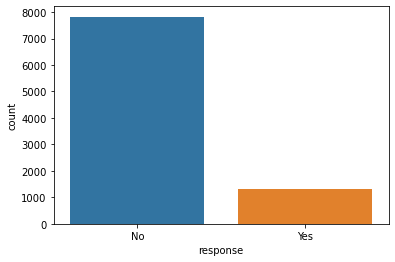

In [53]:
# display(data['response'].value_counts())

# # sns.barplot("response", data=data)
# # plt.show()

# sns.displot(data['response'], bins=2)
# display(plt.show())


sns.countplot(x ='response', data=data)
plt.ylabel('Total number of Responses')
plt.show()

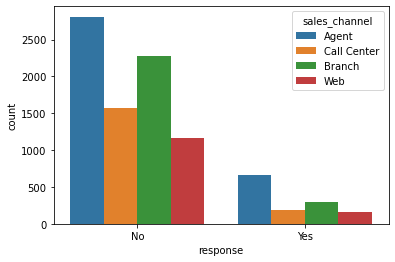

In [56]:
# sns.scatterplot(x='sales_channel', y='response', data=data)
# plt.show()

sns.countplot(x ='response', hue = "sales_channel", data = data)
plt.show()

In [16]:
# to create response rate column

data['response_rate'] = np.where(data.response=='Yes',1,0)

In [ ]:
<matplotlib.axes.

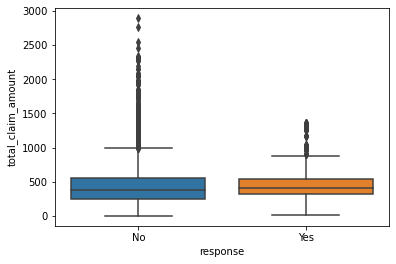

In [59]:
sns.boxplot(x = 'response',y='total_claim_amount', data=data)
plt.show()

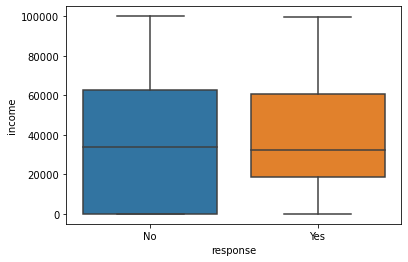

In [61]:
sns.boxplot(x = 'response',y='income', data=data)
plt.show()

# 

# Lab | Customer Analysis Round 4

In today's lesson we talked about continuous distributions (mainly normal distribution), linear regression and how multicollinearity can impact the model. In this lab, we will test your knowledge on those things using the marketing_customer_analysis.csv file. You have been using the same data in the previous labs (round 2 and 3). You can continue using the same jupyter file. The file can be found in the files_for_lab folder.

### Get the data

Use the jupyter file from the last lab (Customer Analysis Round 3)

### Complete the following task

- Check the data types of the columns. Get the numeric data into dataframe called numerical and categorical columns in a dataframe called categoricals. (You can use np.number and np.object to select the numerical data types and categorical data types respectively)
- Now we will try to check the normality of the numerical variables visually
    - Use seaborn library to construct distribution plots for the numerical variables
    - Use Matplotlib to construct histograms
    - Do the distributions for different numerical variables look like a normal distribution
- For the numerical variables, check the multicollinearity between the features. Please note that we will use the column total_claim_amount later as the target variable.
- Drop one of the two features that show a high correlation between them (greater than 0.9). Write code for both the correlation matrix and for seaborn heatmap. If there is no pair of features that have a high correlation, then do not drop any features

In [73]:
data.head()

,customer,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,income,location_code,marital_status,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size,vehicle_type
0,DK49336,Arizona,4809.216960,No,Basic,College,2011-02-18,Employed,M,48029,Suburban,Married,61,7.0,52,0.0,9,Corporate Auto,Corporate L3,Offer3,Agent,292.800000,Four-Door Car,Medsize,A
1,KX64629,California,2228.525238,No,Basic,College,2011-01-18,Unemployed,F,0,Suburban,Single,64,3.0,26,0.0,1,Personal Auto,Personal L3,Offer4,Call Center,744.924331,Four-Door Car,Medsize,unknown
2,LZ68649,Washington,14947.917300,No,Basic,Bachelor,2011-02-10,Employed,M,22139,Suburban,Single,100,34.0,31,0.0,2,Personal Auto,Personal L3,Offer3,Call Center,480.000000,SUV,Medsize,A
3,XL78013,Oregon,22332.439460,Yes,Extended,College,2011-01-11,Employed,M,49078,Suburban,Single,97,10.0,3,0.0,2,Corporate Auto,Corporate L3,Offer2,Branch,484.013411,Four-Door Car,Medsize,A
4,QA50777,Oregon,9025.067525,No,Premium,Bachelor,2011-01-17,Medical Leave,F,23675,Suburban,Married,117,4.0,31,0.0,7,Personal Auto,Personal L2,Offer1,Branch,707.925645,Four-Door Car,Medsize,unknown


In [72]:
#checking datatypes
data.dtypes

customer                                 object
state                                    object
customer_lifetime_value                 float64
response                                 object
coverage                                 object
education                                object
effective_to_date                datetime64[ns]
employmentstatus                         object
gender                                   object
income                                    int64
location_code                            object
marital_status                           object
monthly_premium_auto                      int64
months_since_last_claim                 float64
months_since_policy_inception             int64
number_of_open_complaints               float64
number_of_policies                        int64
policy_type                              object
policy                                   object
renew_offer_type                         object
sales_channel                           

In [74]:
#dividing dataframe into numericals and categoricals
numerical = data.select_dtypes(include = np.number)
categorical = data.select_dtypes(include = object)
display(numerical.head())
display(categorical.head())

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
0,4809.216960,48029,61,7.0,52,0.0,9,292.800000
1,2228.525238,0,64,3.0,26,0.0,1,744.924331
2,14947.917300,22139,100,34.0,31,0.0,2,480.000000
3,22332.439460,49078,97,10.0,3,0.0,2,484.013411
4,9025.067525,23675,117,4.0,31,0.0,7,707.925645


,customer,state,response,coverage,education,employmentstatus,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size,vehicle_type
0,DK49336,Arizona,No,Basic,College,Employed,M,Suburban,Married,Corporate Auto,Corporate L3,Offer3,Agent,Four-Door Car,Medsize,A
1,KX64629,California,No,Basic,College,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer4,Call Center,Four-Door Car,Medsize,unknown
2,LZ68649,Washington,No,Basic,Bachelor,Employed,M,Suburban,Single,Personal Auto,Personal L3,Offer3,Call Center,SUV,Medsize,A
3,XL78013,Oregon,Yes,Extended,College,Employed,M,Suburban,Single,Corporate Auto,Corporate L3,Offer2,Branch,Four-Door Car,Medsize,A
4,QA50777,Oregon,No,Premium,Bachelor,Medical Leave,F,Suburban,Married,Personal Auto,Personal L2,Offer1,Branch,Four-Door Car,Medsize,unknown


In [75]:
#attempting to check the normality of the numerical variables visually, first by describing the data
numerical.describe().T

,count,mean,std,min,25%,50%,75%,max
customer_lifetime_value,9134.0,8004.940475,6870.967608,1898.007675,3994.251794,5780.182197,8962.167041,83325.381190
income,9134.0,37657.380009,30379.904734,0.000000,0.000000,33889.500000,62320.000000,99981.000000
monthly_premium_auto,9134.0,93.219291,34.407967,61.000000,68.000000,83.000000,109.000000,298.000000
months_since_last_claim,9134.0,15.097000,10.073257,0.000000,6.000000,14.000000,23.000000,35.000000
months_since_policy_inception,9134.0,48.064594,27.905991,0.000000,24.000000,48.000000,71.000000,99.000000
number_of_open_complaints,9134.0,0.384388,0.910384,0.000000,0.000000,0.000000,0.000000,5.000000
number_of_policies,9134.0,2.966170,2.390182,1.000000,1.000000,2.000000,4.000000,9.000000
total_claim_amount,9134.0,434.088794,290.500092,0.099007,272.258244,383.945434,547.514839,2893.239678


**Not really clear how these values could correlate at all, at first I assumed income may be the most explanatory, but then I checked the correlations matrix and heatmap and found little correlations. I am wondering if there is a mistake in my dataset after cleaning?**

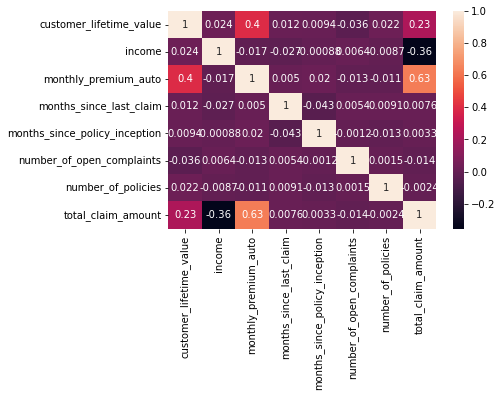

In [76]:
#checking correlations between variables
correlations_matrix = numerical.corr()
sns.heatmap(correlations_matrix, annot=True)
plt.show()

In [77]:
correlations_matrix

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
customer_lifetime_value,1.000000,0.024366,0.396262,0.011517,0.009418,-0.036343,0.021955,0.226451
income,0.024366,1.000000,-0.016665,-0.026715,-0.000875,0.006408,-0.008656,-0.355254
monthly_premium_auto,0.396262,-0.016665,1.000000,0.005026,0.020257,-0.013122,-0.011233,0.632017
months_since_last_claim,0.011517,-0.026715,0.005026,1.000000,-0.042959,0.005354,0.009136,0.007563
months_since_policy_inception,0.009418,-0.000875,0.020257,-0.042959,1.000000,-0.001158,-0.013333,0.003335
number_of_open_complaints,-0.036343,0.006408,-0.013122,0.005354,-0.001158,1.000000,0.001498,-0.014241
number_of_policies,0.021955,-0.008656,-0.011233,0.009136,-0.013333,0.001498,1.000000,-0.002354
total_claim_amount,0.226451,-0.355254,0.632017,0.007563,0.003335,-0.014241,-0.002354,1.000000


**Looks like income is rather poor to correlate to... Best bet seems monthly premium matched to both customer lifetime value and total claim amount. A bit stumped by this, but attempting to plot some charts below**

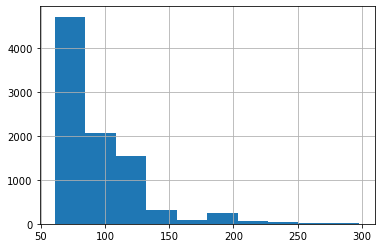

In [78]:
#inse
numerical['monthly_premium_auto'].hist()
plt.show()

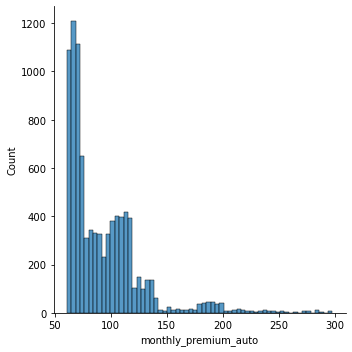

In [79]:
sns.displot(numerical['monthly_premium_auto'])
plt.show()

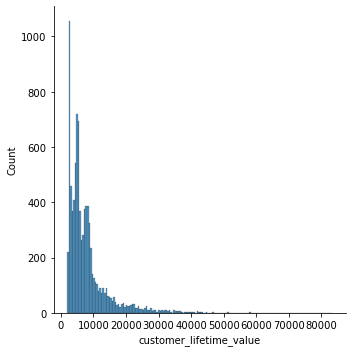

In [80]:
sns.displot(numerical['customer_lifetime_value'])
plt.show()

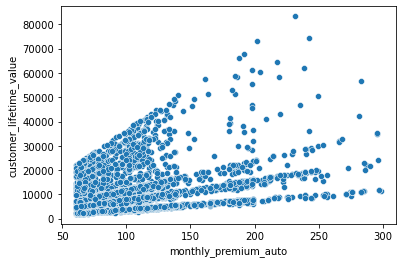

In [81]:
sns.scatterplot(x='monthly_premium_auto',y='customer_lifetime_value',data=numerical)
plt.show()

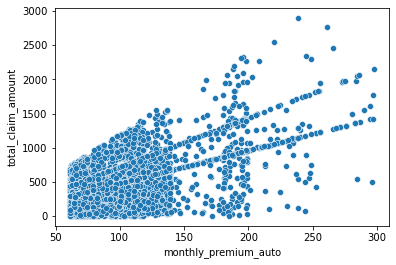

In [82]:
sns.scatterplot(x='monthly_premium_auto',y='total_claim_amount',data=numerical)
plt.show()

**The above show a cler relationship and trend, but the correlation is still very poor, so I decided not to drop any values as was requested**

# 

# Lab | Customer Analysis Round 5

For this lab, we still keep using the marketing_customer_analysis.csv file that you can find in the files_for_lab folder.

### Get the data

We are using the marketing_customer_analysis.csv file.

### Dealing with the data

Already done in the round 2.

### Explore the data

Done in the round 3.

### Processing Data

(Further processing...)

- X-y split.
- Normalize (numerical).

In [83]:
# didn't feel so well, went to bed to clear my head
# also, I feel like I really need to revise this lesson, especially MinMax went a bit over my head 